In [1]:
# 기본 데이터 설정

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt(fname = "Breast_cancer_data.txt")

X = data[:, :9] # w[0] ~ w[8]까지의 데이터, 683x9 행렬
T = data[:, 9] # w[9]의 데이터, 683*1 행렬
X = X.astype(int)
T = T.astype(int)

StudentID = "2016146022"
W = np.loadtxt(fname=StudentID+".txt")
W = W.astype(int)
X_n = data.shape[0] # X_n을 정수형 변수로 만듦

print(X.shape)
print(T.shape)
print(X_n)



(683, 9)
(683,)
683


In [2]:
def gauss(x, mu, s):
    return np.exp(-(x-mu)**2 / (2 * s**2))

def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(0, 1, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x)
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    for i in range(9):
        mse = np.mean((y[:,i]-t)**2)
    return mse

def show_gauss_func(w):
    xb = np.linspace(0, 1, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

def fit_gauss_func(x, t, m):
    mu = np.linspace(0, 1, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

In [3]:
def kfold_gauss_func(x, t, m, k):
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(X_n), k) != i]
        t_train = t[np.fmod(range(X_n), k) != i]
        x_test = x[np.fmod(range(X_n), k) == i]
        t_test = t[np.fmod(range(X_n), k) == i]
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        print("mse_train(M = {0:d}): {1:.2f}".format(m, mse_train[i]))
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
        print("mse_test(M = {0:d}): {1:.2f}".format(m, mse_test[i]))
    return mse_train, mse_test
    
M = range(2, 10)
K = range(2, 5)
wm = np.zeros(len(M))
for j in range(0, len(K)):
    print(j+2)
    for i in range(0, len(M)):
        mse_train, mse_test = kfold_gauss_func(X, T, M[i], K[j])


2
mse_train(M = 2): 0.41
mse_test(M = 2): 0.42
mse_train(M = 2): 0.46
mse_test(M = 2): 0.45
mse_train(M = 3): 0.31
mse_test(M = 3): 0.32
mse_train(M = 3): 0.34
mse_test(M = 3): 0.34
mse_train(M = 4): 0.30
mse_test(M = 4): 0.31
mse_train(M = 4): 0.33
mse_test(M = 4): 0.32
mse_train(M = 5): 0.30
mse_test(M = 5): 0.30
mse_train(M = 5): 0.33
mse_test(M = 5): 0.32
mse_train(M = 6): 0.30
mse_test(M = 6): 0.30
mse_train(M = 6): 0.33
mse_test(M = 6): 0.32
mse_train(M = 7): 0.30
mse_test(M = 7): 0.30
mse_train(M = 7): 0.33
mse_test(M = 7): 0.32
mse_train(M = 8): 0.30
mse_test(M = 8): 0.30
mse_train(M = 8): 0.33
mse_test(M = 8): 0.32
mse_train(M = 9): 0.30
mse_test(M = 9): 0.30
mse_train(M = 9): 0.33
mse_test(M = 9): 0.32
3
mse_train(M = 2): 0.33
mse_test(M = 2): 0.35
mse_train(M = 2): 0.46
mse_test(M = 2): 0.42
mse_train(M = 2): 0.50
mse_test(M = 2): 0.51
mse_train(M = 3): 0.29
mse_test(M = 3): 0.30
mse_train(M = 3): 0.35
mse_test(M = 3): 0.32
mse_train(M = 3): 0.35
mse_test(M = 3): 0.35
mse_tr

[-0.03086731 -0.28425364 -0.16147806  0.00285591 -0.00107926 -0.2728478
 -0.05250225 -0.02281014  0.74204405  1.        ]
SD = 1.41


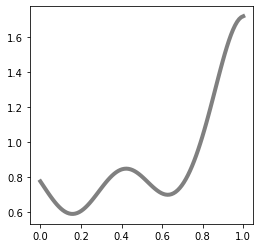

In [4]:
M = 4
plt.figure(figsize = (4, 4))
W = fit_gauss_func(X, T, M)
W = np.r_[W[:], 1]
print(W)
show_gauss_func(W)

mse = mse_gauss_func(X, T, W)
print("SD = {0:.2f}".format(np.sqrt(mse)))
plt.show()

In [5]:
# 로지스틱 회귀 모델을 통한 분류
def logistic2(x, w):
    y = np.zeros(X_n)
    for i in range(X_n):
        x = np.r_[X[i, :], 1]
        u = np.array(w).dot(x)
        y[i] = 1 / (1 + np.exp(-u))
    return y

cost = logistic2(X, W)
for i in range(X_n):
    print('cost[{0:d}]: {1:.2f}'.format(i+1, cost[i]))

cost[1]: 0.95
cost[2]: 0.70
cost[3]: 0.66
cost[4]: 0.57
cost[5]: 0.69
cost[6]: 0.01
cost[7]: 0.44
cost[8]: 0.68
cost[9]: 0.67
cost[10]: 0.02
cost[11]: 0.03
cost[12]: 0.68
cost[13]: 0.10
cost[14]: 0.69
cost[15]: 0.69
cost[16]: 0.01
cost[17]: 0.71
cost[18]: 0.60
cost[19]: 0.02
cost[20]: 0.33
cost[21]: 0.60
cost[22]: 0.69
cost[23]: 0.67
cost[24]: 0.71
cost[25]: 0.69
cost[26]: 0.68
cost[27]: 0.58
cost[28]: 0.70
cost[29]: 0.08
cost[30]: 0.06
cost[31]: 0.68
cost[32]: 0.06
cost[33]: 0.69
cost[34]: 0.67
cost[35]: 0.70
cost[36]: 0.63
cost[37]: 0.63
cost[38]: 0.16
cost[39]: 0.21
cost[40]: 0.69
cost[41]: 0.71
cost[42]: 0.01
cost[43]: 0.13
cost[44]: 0.62
cost[45]: 0.00
cost[46]: 0.67
cost[47]: 0.02
cost[48]: 0.05
cost[49]: 0.01
cost[50]: 0.62
cost[51]: 0.03
cost[52]: 0.22
cost[53]: 0.01
cost[54]: 0.60
cost[55]: 0.69
cost[56]: 0.69
cost[57]: 0.71
cost[58]: 0.71
cost[59]: 0.38
cost[60]: 0.68
cost[61]: 0.68
cost[62]: 0.69
cost[63]: 0.38
cost[64]: 0.03
cost[65]: 0.03
cost[66]: 0.70
cost[67]: 0.69
cost

In [6]:
def cee_logistic(w,x,t): #교차 엔트로피 오차 계산
    X_n = x.shape[0]
    y = logistic2(x, w)
    cee= 0
    for n in range(len(y)):
        cee = cee - (t[n]*np.log(y[n])+(1-t[n])*np.log(1-y[n]))
    cee = cee/X_n
    return cee

cee = cee_logistic(W, X, T)
print(cee)

1.7660851765584105


In [7]:
def diagnosis(y):
    decision = np.zeros(X_n).astype(int)
    for i in range(X_n):
        if y[i] < 0.5:
            decision[i] = 1 # 양성으로 진단
        else:
            decision[i] = 0; # 악성으로 진단
    return decision

decision = diagnosis(cost)
print(decision)

[0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0
 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1
 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1
 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1
 0 1 0 1 1 0 1 0 0 0 1 0 

In [8]:
def validate_model(w):
    d = np.loadtxt(fname = "Breast_cancer_data.txt")
    X = d[:, :9].astype(int)
    T = d[:, 9].astype(int)
    
    N = X.shape[0]
    
    y = np.zeros(N)
    decision = np.zeros(N).astype(int)
    err_cnt = 0
    
    print('No. \t Y \t T')
    print('====================')
    for i in range(N):
        x = np.r_[X[i, :], 1]
        u = np.array(w).dot(x)
        y[i] = 1 / (1 + np.exp(-u))
        if y[i] < 0.5:
            decision[i] = 1
        if decision[i] != T[i]:
            err_cnt = err_cnt + 1
            
        print('{0} \t {1} \t {2}'.format(i+1, decision[i], T[i]))
    hit_ratio = np.round((1-err_cnt/N)*100, 1)
    
    print('====================')
    print('Total Error : {0} out of {1}'.format(err_cnt, N))
    print('Hit ratio : {0:.1f} % '.format(hit_ratio))
    
    return hit_ratio

StudentID = "2016146022"
w = np.loadtxt(fname = StudentID+'.txt')

print("Student ID: " + StudentID)
print("W = " + np.str(w))
print("\n")

validate_model(w)

Student ID: 2016146022
W = [-0.03  -0.28  -0.16   0.002 -0.001 -0.27  -0.05  -0.02   0.74   1.   ]


No. 	 Y 	 T
1 	 0 	 1
2 	 0 	 0
3 	 0 	 0
4 	 0 	 0
5 	 0 	 0
6 	 1 	 1
7 	 1 	 1
8 	 0 	 0
9 	 0 	 0
10 	 1 	 1
11 	 1 	 1
12 	 0 	 0
13 	 1 	 1
14 	 0 	 0
15 	 0 	 0
16 	 1 	 1
17 	 0 	 0
18 	 0 	 0
19 	 1 	 1
20 	 1 	 1
21 	 0 	 0
22 	 0 	 0
23 	 0 	 0
24 	 0 	 0
25 	 0 	 0
26 	 0 	 0
27 	 0 	 0
28 	 0 	 0
29 	 1 	 1
30 	 1 	 1
31 	 0 	 0
32 	 1 	 1
33 	 0 	 0
34 	 0 	 0
35 	 0 	 0
36 	 0 	 0
37 	 0 	 0
38 	 1 	 1
39 	 1 	 1
40 	 0 	 0
41 	 0 	 0
42 	 1 	 1
43 	 1 	 1
44 	 0 	 1
45 	 1 	 1
46 	 0 	 0
47 	 1 	 1
48 	 1 	 1
49 	 1 	 1
50 	 0 	 0
51 	 1 	 1
52 	 1 	 1
53 	 1 	 1
54 	 0 	 0
55 	 0 	 0
56 	 0 	 0
57 	 0 	 0
58 	 0 	 0
59 	 1 	 1
60 	 0 	 0
61 	 0 	 0
62 	 0 	 0
63 	 1 	 0
64 	 1 	 1
65 	 1 	 1
66 	 0 	 0
67 	 0 	 0
68 	 0 	 0
69 	 0 	 0
70 	 1 	 1
71 	 1 	 1
72 	 0 	 0
73 	 1 	 1
74 	 0 	 0
75 	 1 	 1
76 	 0 	 0
77 	 0 	 0
78 	 0 	 0
79 	 0 	 0
80 	 1 	 1
81 	 1 	 1
82 	 

90.6